<a href="https://colab.research.google.com/github/Shoterjust/SC2001-Projects/blob/main/Project%201/SMAC_grp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import time
import math

(a) Algorithm implementation

In [ ]:
class Counter():
  def __init__(self):
    self.c = 0
  def add(self, k = 1):
    self.c += k

In [ ]:
def insertion_sort(n,cnt:Counter):
    global COMPARISONS
    for i in range(1, len(n)):
        for j in range(i,0,-1):
            cnt.add(1)
            if n[j] < n[j-1]:
                n[j], n[j-1] = n[j-1], n[j]
            else:
                break
    return n

In [ ]:
def merge(left, right,cnt:Counter):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        cnt.add(1)
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def merge_sort(n,cnt:Counter):
    if len(n) <= 1:
        return n
    mid = len(n) // 2
    left = merge_sort(n[:mid],cnt)
    right = merge_sort(n[mid:],cnt)
    return merge(left,right,cnt)

In [ ]:
def hybrid_sort(n,S,cnt:Counter):
    if len(n) <= S:
        return insertion_sort(n,cnt)

    else:
        mid = len(n) // 2
        left = hybrid_sort(n[:mid],S,cnt)
        right = hybrid_sort(n[mid:],S,cnt)
        return merge(left,right,cnt)

In [ ]:
# Example for part (a)
def part_a():
    cnt_h = Counter()
    arr = [14, 40, 31, 28, 3, 15, 17, 51]
    sorted_arr = hybrid_sort(arr,4, cnt_h)
    print(sorted_arr)
    print(cnt_h.c)

In [ ]:
part_a()

[3, 14, 15, 17, 28, 31, 40, 51]
16


(b) Generate input data

In [ ]:
def random_array(n,seed,maximum):
    rnd = random.Random(seed)
    arr = [rnd.randint(1, maximum) for _ in range(n)]
    return arr

In [ ]:
def part_b():
    global COMPARISONS
    COMPARISONS = 0
    sizes = [1000, 10000, 100000, 1000000]               # let sizes (chosen betwwen 1000 to 10 million) be 1000, 10000, 100000, 1000000, 10000000
    seed = 10                                                      # random seed chosen to make dataset reproducible
    x = 10000000                                                   # let x (largest number) be 10 million

    for size in sizes:
        arr = random_array(size, seed, x)
        print(f"Generated array of size {size}, last 5 integers: {arr[:5]}")

In [ ]:
# Example for part (b)
part_b()

(c) Analyze time complexity

In [ ]:
def part_c_i():
    global COMPARISONS
    COMPARISONS = 0
    sizes = [1000, 10000, 100000, 1000000]
    seed = 10
    com_arr = []
    x = 10000000

    for size in sizes:
        cnt_h = Counter()
        arr = random_array(size, seed, x)
        hybrid_sort(arr,20,cnt_h)                          # fix S = 20
        com_arr.append(cnt_h.c)

    #plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.xlabel("n values")
    plt.ylabel("number of comparisons")
    plt.plot(sizes, com_arr)


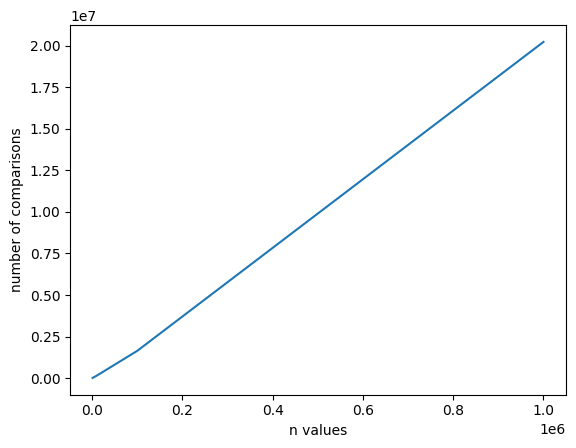

In [ ]:
part_c_i()

In [ ]:
def part_c_ii(): #fix n, vary S
  Ss = [2, 4, 8, 12, 16, 24, 32, 48, 64, 96, 128, 192, 256]
  comp_arr = []
  for S in Ss:
    cnt_h = Counter()
    arr = random_array(1000,10,1000)
    hybrid_sort(arr,S,cnt_h)
    comp_arr.append(cnt_h.c)

  plt.xlabel("S values")
  plt.ylabel("number of comparisons")
  plt.plot(Ss, comp_arr)

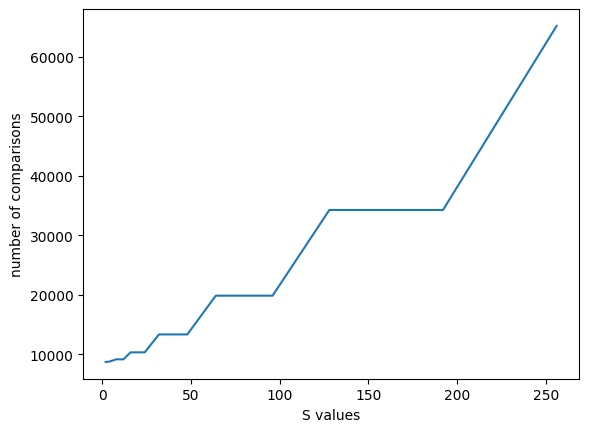

In [ ]:
part_c_ii()

In [ ]:
def part_c_iii():  # Pick S that minimizes comparisons AND check runtime
    import math

    # ---- config (keep n modest so it runs fast in Python) ----
    n = 200_000            # fixed n for evaluation (adjust if needed)
    seed = 10              # same style as your part_b
    x_max = 10_000_000
    TRIALS = 1             # increase to smooth noise (slower)
    S_candidates = [i for i in range(1,101)]

    # Build trial base arrays first so every S sees identical inputs
    bases = [random_array(n, seed + t, x_max) for t in range(TRIALS)]

    comps, times = [], []

    for S in S_candidates:
        total_comp = 0
        total_time = 0.0
        for base in bases:
            cnt = Counter()
            arr = base.copy()
            t0 = time.perf_counter()
            hybrid_sort(arr, S, cnt)
            t1 = time.perf_counter()
            total_comp += cnt.c
            total_time += (t1 - t0)
        comps.append(total_comp / TRIALS)
        times.append(total_time / TRIALS)
        print(f"S={S:>3} | comparisons={int(comps[-1])} | time={times[-1]:.6f}s")

    # Argmin by comparisons
    best_idx_comp = min(range(len(S_candidates)), key=lambda i: comps[i])
    best_S_comp = S_candidates[best_idx_comp]

    # Argmin by time
    best_idx_time = min(range(len(S_candidates)), key=lambda i: times[i])
    best_S_time = S_candidates[best_idx_time]

    print("\n(c)(iii) Results:")
    print(f"Comparisons-optimal S (empirical): {best_S_comp}")
    print(f"Time-optimal S (empirical)       : {best_S_time}")

    # Theory reference for comparisons: S* = 4 / ln 2 ≈ 5.77 → ~6
    s_theory = round(4 / math.log(2))
    print(f"Theoretical S* (comparisons)     : {s_theory}  (≈ 4/ln 2)")


In [ ]:
part_c_iii()

S=  1 | comparisons=3272989 | time=1.105176s
S=  2 | comparisons=3272989 | time=1.051924s
S=  3 | comparisons=3272916 | time=0.985360s
S=  4 | comparisons=3273805 | time=1.487134s
S=  5 | comparisons=3273805 | time=1.605390s
S=  6 | comparisons=3310036 | time=0.957948s
S=  7 | comparisons=3316646 | time=0.966750s
S=  8 | comparisons=3316646 | time=0.941761s
S=  9 | comparisons=3316646 | time=0.950263s
S= 10 | comparisons=3316646 | time=0.950200s
S= 11 | comparisons=3316646 | time=0.950354s
S= 12 | comparisons=3439993 | time=0.957026s
S= 13 | comparisons=3479368 | time=0.950753s
S= 14 | comparisons=3479368 | time=0.950264s
S= 15 | comparisons=3479368 | time=0.963165s
S= 16 | comparisons=3479368 | time=1.525977s
S= 17 | comparisons=3479368 | time=1.527217s
S= 18 | comparisons=3479368 | time=0.946446s
S= 19 | comparisons=3479368 | time=0.956778s
S= 20 | comparisons=3479368 | time=0.962377s
S= 21 | comparisons=3479368 | time=0.933667s
S= 22 | comparisons=3479368 | time=0.947354s
S= 23 | co

(d) Compare with original Mergesort

In [ ]:
def part_d():
  S = 9
  arr = random_array(10000000,10,1000)
  cnt_m = Counter()
  cnt_h = Counter()

  merge_startTime = time.time()
  merge_sort(arr.copy(),cnt_m)
  merge_endTime = time.time()
  merge_runTime = merge_endTime - merge_startTime

  hybrid_startTime = time.time()
  hybrid_sort(arr.copy(),S,cnt_h)
  hybrid_endTime = time.time()
  hybrid_runTime = hybrid_endTime - hybrid_startTime


  print("Number of key comparisons for Merge Sort: " + str(cnt_m.c))
  print("CPU time for Merge Sort: " + str(merge_runTime))
  print("Number of key comparisons for Hybrid Sort: " + str(cnt_h.c))
  print("CPU time for Hybrid Sort: " + str(hybrid_runTime))

In [ ]:
part_d()

Number of key comparisons for Merge Sort: 220041101
CPU time for Merge Sort: 83.2165732383728
Number of key comparisons for Hybrid Sort: 223086049
CPU time for Hybrid Sort: 75.83593773841858
